# Movie recommendation using collaborative filtering

# Movie Lens Data

This dataset (ml-latest-small) describes 5-star rating and free-text tagging activity from [MovieLens](http://movielens.org), a movie recommendation service. It contains 100836 ratings and 3683 tag applications across 9742 movies. These data were created by 610 users between March 29, 1996 and September 24, 2018. This dataset was generated on September 26, 2018.

Users were selected at random for inclusion. All selected users had rated at least 20 movies. No demographic information is included. Each user is represented by an id, and no other information is provided.

The data are contained in the files `links.csv`, `movies.csv`, `ratings.csv` and `tags.csv`. More details about the contents and use of all these files follows.

This is a *development* dataset. As such, it may change over time and is not an appropriate dataset for shared research results. See available *benchmark* datasets if that is your intent.

This and other GroupLens data sets are publicly available for download at <http://grouplens.org/datasets/>.

http://files.grouplens.org/datasets/movielens/ml-latest-small-README.html

In [81]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

[Movies](https://drive.google.com/file/d/18tPRWq1GTBF80VVxlNul5Z23omySeKme/view?usp=sharing)


[Ratings](https://drive.google.com/file/d/1VhLpsjl77bInKwoLel8ko3ZjKbG8p6gz/view?usp=sharing)

[Links](https://drive.google.com/file/d/14uKpftIYDQRsgqBTxmtTK5Fs_aBqm6Zz/view?usp=sharing)

[Tags](https://drive.google.com/file/d/10RG-1S90QtPhmyc6nSuikUaHDO0QwQGo/view?usp=sharing)

In [82]:
# Load data
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
links = pd.read_csv('links.csv')
tags = pd.read_csv('tags.csv')

# Create user-movie matrix from ratings.csv
ratings.csv is not in the form of matrix. We will need to convert this file into the matrix which is user X movie 

In [83]:
ratings_matrix = ratings.pivot(index='userId',columns='movieId',values='rating').fillna(0)
ratings_matrix = ratings_matrix.values

In [84]:
ratings.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [85]:
movies.describe()

,movieId
count,9742.000000
mean,42200.353623
std,52160.494854
min,1.000000
25%,3248.250000
50%,7300.000000
75%,76232.000000
max,193609.000000


In [86]:
ratings_matrix.shape

(610, 9724)

## Collaborative Filtering: Explanation extracted from Aggarwal (2016)

According to Aggarwal (2016), the basic models for recommender systems work with two kinds of data, which are (i) the user-item interactions, such as ratings or buying behavior, and (ii) the attribute information about the users and items such as textual profiles or relevant keywords. Methods that use the former are referred to as collaborative filtering methods, whereas methods that use the latter are referred to as content-based recommender methods. 

The basic idea of collaborative filtering methods is that these unspecified ratings can be imputed because the observed ratings are often highly correlated across various users and items. For example, consider two users named Alice and Bob, who have very similar tastes. If the ratings, which both have specified, are very similar, then their similarity can be identified by the underlying algorithm. In such cases, it is very likely that the ratings in which only one of them has specified a value, are also likely to be similar. This similarity can be used to make inferences about incompletely specified values (Aggarwal, 2016).

Aggarwal (2016) classifies that there are two types of methods that are commonly used in collaborative filtering, which are referred to as memory-based methods and model-based methods:

1. **Memory-based methods**: Memory-based methods are also referred to as neighborhood-based collaborative filtering algorithms. These were among the earliest collaborative filtering algorithms, in which the ratings of user-item combinations are predicted on the basis of their neighborhoods. These neighborhoods can be defined in one of two ways:

   1.1 User-based collaborative filtering: the ratings provided by like-minded users of a target user A are used in order to make the recommendations for A. Thus, the basic idea is to determine users, who are similar to the target user A, and recommend ratings for the unobserved ratings of A by computing weighted averages of the ratings of this peer group.

   1.2 Item-based collaborative filtering: In order to make the rating predictions for target item B by user A, the first step is to determine a set S of items that are most similar to target item B. The ratings in item set S, which are specified by A, are used to predict whether the user A will like item B.

   
2. **Model-based methods**: machine learning and data mining methods are used in the context of predictive models. In cases where the model is parameterized, the parameters of this model are learned within the context of an optimization framework. Some examples of such model-based methods include decision trees, rule-based models, Bayesian methods and latent factor models. Matrix factorization which is mentioned later is one of latent factor models.

## Nearest Neighbors based approach

The most naive neighbor search implementation involves the brute-force computation of distances between all pairs of points in the dataset: for $N$ samples in $D$ dimensions, this approach scales as $O(N^2 D)$.

https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbor-algorithms

Using this brute-force approach, we can find simlar users to target users or simlar movies to target movies

Code reference: https://beckernick.github.io/music_recommender/

## Find similar users

In [87]:
from sklearn.neighbors import NearestNeighbors
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(ratings_matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [88]:
query_index = np.random.choice(ratings_matrix.shape[0])
distances, indices = model_knn.kneighbors(ratings_matrix[query_index, :].reshape(1, -1), n_neighbors = 6)

for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Target user: ', query_index)
    else:
        print('Similar user: ', indices.flatten()[i])

Target user:  344
Similar user:  270
Similar user:  376
Similar user:  439
Similar user:  554
Similar user:  145


## Find similar movies

In [89]:
from sklearn.neighbors import NearestNeighbors
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
matrix = np.transpose(ratings_matrix)
model_knn.fit(matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [90]:
query_index = np.random.choice(matrix.shape[0])
distances, indices = model_knn.kneighbors(matrix[query_index, :].reshape(1, -1), n_neighbors = 6)

for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Target movie: ', movies.loc[query_index].title)
    else:
        print('Recommended movie: ', movies.loc[indices.flatten()[i]].title)

Target movie:  A Bad Moms Christmas (2017)
Recommended movie:  Reality (2014)
Recommended movie:  La cravate (1957)
Recommended movie:  Head of State (2003)
Recommended movie:  Ben X (2007)
Recommended movie:  Serenity (2005)


## Non-Negative Matrix Factorization
We have a matrix $\textbf{X}$ consisting of movies and users. Since users don't necessarily watch all movies, we expect this movie-user matrix to be sparse (i.e contains lots of zeros). Non-Negative Matrix Factorization (NMF) is used to approximate this matrix $X$ by the dot product of two matrices $\textbf{W}$ and $\textbf{H}$. Dimensions of matrices are defined by dimensions of original matrix $X$ and number of components we set when using the algorithm (Hastie et al., 2009).

$$\textbf{X} \approx \textbf{W} \textbf{H}$$

Algorithm will minimize the L2 norm of the difference between $\textbf{X}$ and $\textbf{W} \textbf{H}$
$$J = || \textbf{X} - \textbf{W} \textbf{H} ||^2$$

Following diagram illustartes an example when number of components is 2.


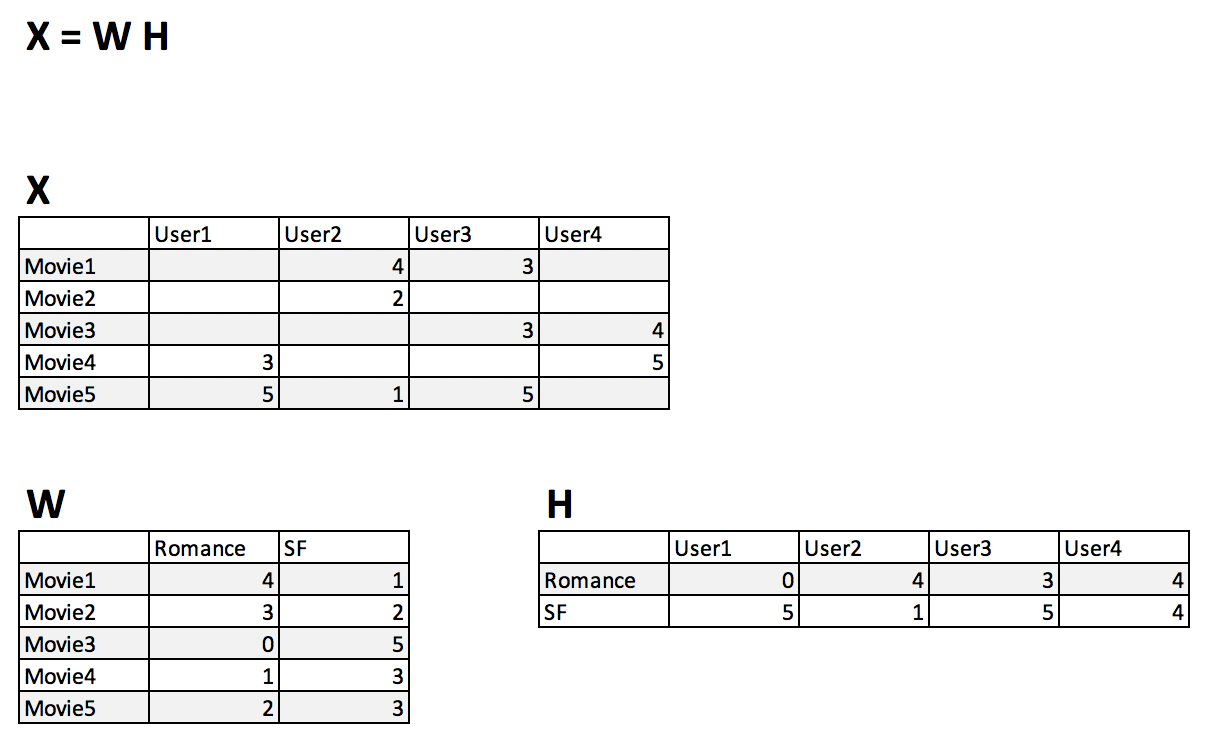

In [91]:
from sklearn.decomposition import NMF
model = NMF(n_components=3, init='random', random_state=42)
W = model.fit_transform(ratings_matrix)
H = model.components_

In [92]:
pred = np.dot(W,H)

## Recommend movie for an user

In [93]:
userId = 3
num_of_recommendation = 10

## Create a list of movies which the user has not watched and rating is highest

In [94]:
list_of_movies_unwatched = pred[userId-1][np.where(ratings_matrix[userId-1]==0)]

In [95]:
list_of_recommended_movies

array([ 889, 1202,  820,  888,  653,  853,  688,  518, 2122,  899])

In [96]:
movies.loc[list_of_recommended_movies].title

889                       Sex, Lies, and Videotape (1989)
1202                               She's So Lovely (1997)
820                   Monty Python's Life of Brian (1979)
888                                   My Left Foot (1989)
653     Eyes Without a Face (Yeux sans visage, Les) (1...
853                                 On Golden Pond (1981)
688                                       Gaslight (1944)
518                                   One Fine Day (1996)
2122    Three Days of the Condor (3 Days of the Condor...
899                            Princess Bride, The (1987)
Name: title, dtype: object

In [97]:
list_of_recommended_movies = np.argsort(list_of_movies_unwatched)[-num_of_recommendation:]

In [98]:
list_of_recommended_movies

array([ 889, 1202,  820,  888,  653,  853,  688,  518, 2122,  899])

In [99]:
#movies.set_index('movieId')

In [100]:
list_of_recommended_movies_df = movies.loc[movies['movieId'].isin(list_of_recommended_movies)]

In [101]:
list_of_recommended_movies_df

,movieId,title,genres
453,518,"Road to Wellville, The (1994)",Comedy
549,653,Dragonheart (1996),Action|Adventure|Fantasy
565,688,Operation Dumbo Drop (1995),Action|Adventure|Comedy|War
673,888,Land Before Time III: The Time of the Great Gi...,Adventure|Animation|Children|Musical
674,889,1-900 (06) (1994),Drama|Romance
681,899,Singin' in the Rain (1952),Comedy|Musical|Romance
904,1202,Withnail & I (1987),Comedy
1583,2122,Children of the Corn (1984),Horror|Thriller


## Singular Value Decompostion

Alternatively, we can use Singular Value Decompostion

In [102]:
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(ratings_matrix, k = 50)
sigma = np.diag(sigma)
predicted_ratings = np.dot(np.dot(U, sigma), Vt) + np.mean(ratings_matrix,axis=1).reshape(-1, 1)

## Recommend movies for an user

In [103]:
userId = 3
num_of_recommendation = 10

In [104]:
list_of_movies_unwatched = pred[userId-1][np.where(ratings_matrix[userId-1]==0)]

In [105]:
list_of_recommended_movies = np.argsort(list_of_movies_unwatched)[-num_of_recommendation:]

In [106]:
list_of_recommended_movies

array([ 889, 1202,  820,  888,  653,  853,  688,  518, 2122,  899])

In [107]:
list_of_recommended_movies_df = movies.loc[movies['movieId'].isin(list_of_recommended_movies)]

In [108]:
list_of_recommended_movies_df

,movieId,title,genres
453,518,"Road to Wellville, The (1994)",Comedy
549,653,Dragonheart (1996),Action|Adventure|Fantasy
565,688,Operation Dumbo Drop (1995),Action|Adventure|Comedy|War
673,888,Land Before Time III: The Time of the Great Gi...,Adventure|Animation|Children|Musical
674,889,1-900 (06) (1994),Drama|Romance
681,899,Singin' in the Rain (1952),Comedy|Musical|Romance
904,1202,Withnail & I (1987),Comedy
1583,2122,Children of the Corn (1984),Horror|Thriller


## Reference

T. Hastie, R. Tibshirani and J. Friedman (2009) The Elements of Statistical Learning, Second Edition, Springer


Charu C. Aggarwal (2016) Recommender Systems, Springer, April 2016